Predicted price for 225 sq ft house: $325.00


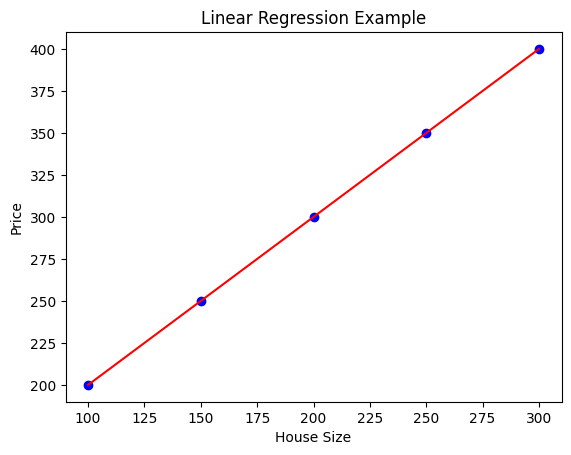

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([[100], [150], [200], [250], [300]])  # house sizes
y = np.array([200, 250, 300, 350, 400])            # house prices

# Model
model = LinearRegression()
model.fit(X, y)

# Prediction
predicted = model.predict([[225]])
print(f"Predicted price for 225 sq ft house: ${predicted[0]:.2f}")

# Plotting
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.xlabel('House Size')
plt.ylabel('Price')
plt.title('Linear Regression Example')
plt.show()


In [2]:
!pip install matplotlib


  Using cached matplotlib-3.10.1-cp310-cp310-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp310-cp310-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp310-cp310-macosx_10_9_universal2.whl.metadata (101 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.2 kB)
Using cached matplotlib-3.10.1-cp310-cp310-macosx_11_0_arm64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp310-cp310-macosx_11_0_arm64.whl (253 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp310-cp310-macosx_10_9_universal2.whl (2.8 MB)
Using cached kiwisolver-1.4.8-cp310-cp310-macosx_11_0_arm64.whl (65 kB)


In [9]:
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score

# Example data: [study hours, attendance]
X = [[2, 75], [4, 80], [6, 85], [8, 90], [10, 95]]
y = [0, 0, 1, 1, 1]  # 0 = Fail, 1 = Pass

# Model
model = LogisticRegression()
model.fit(X, y)

# Predict if a student with 5 hours study and 82% attendance will pass
pred = model.predict([[5, 82]])
prob = model.predict_proba([[5, 82]])

print("Prediction (1=Pass, 0=Fail):", pred[0])
print("Probability of Passing:", prob[0][1])


Prediction (1=Pass, 0=Fail): 0
Probability of Passing: 0.4170335047499815


Will they buy? Yes


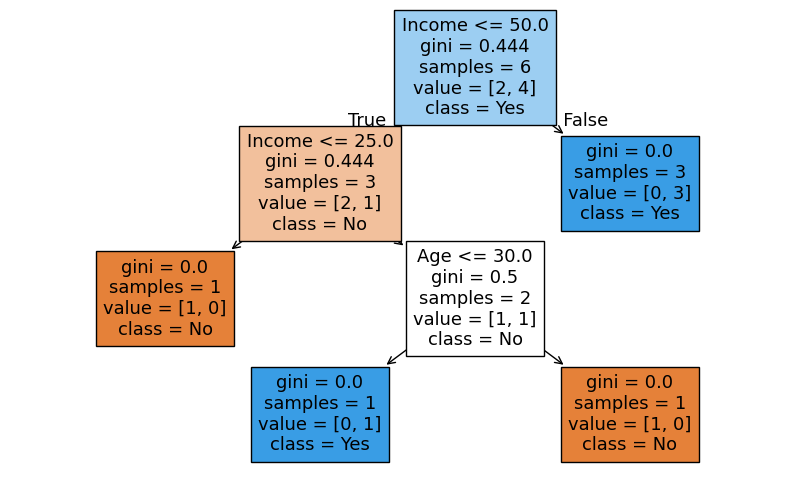

In [13]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Data: [age, income in $1000s]
X = np.array([
    [25, 30],
    [35, 40],
    [45, 80],
    [20, 20],
    [35, 60],
    [52, 100]
])

# Labels: 1 = Buy, 0 = Don't Buy
y = np.array([1, 0, 1, 0, 1, 1])

# Model
model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(X, y)

# Predict for someone age 30, income 50K
prediction = model.predict([[30, 50]])
print("Will they buy?", "Yes" if prediction[0] == 1 else "No")

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plot_tree(model, filled=True, feature_names=["Age", "Income"], class_names=["No", "Yes"])
plt.show()



In [14]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Data: [age, income]
X = np.array([
    [25, 30],
    [35, 40],
    [45, 80],
    [20, 20],
    [35, 60],
    [52, 100]
])

# Labels: 1 = Buy, 0 = Don't Buy
y = np.array([1, 0, 1, 0, 1, 1])

# Create and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Predict
prediction = model.predict([[30, 50]])
print("Will they buy?", "Yes" if prediction[0] == 1 else "No")


Will they buy? Yes


Predicted class: 0


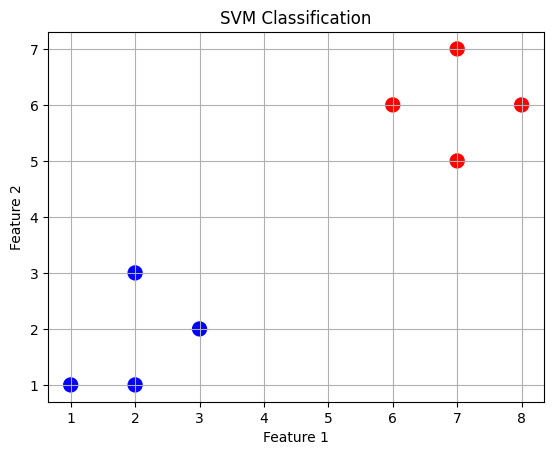

In [20]:
from sklearn.svm import SVC
import numpy as np

# Sample data: [feature1, feature2]
X = np.array([
    [2, 3],
    [1, 1],
    [2, 1],
    [3, 2],
    [6, 6],
    [7, 7],
    [8, 6],
    [7, 5]
])

# Labels: 0 or 1
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

# Create and train the model
model = SVC(kernel='linear')  # or try 'rbf', 'poly'
model.fit(X, y)

# Predict a new point
prediction = model.predict([[4, 4]])
print("Predicted class:", prediction[0])

import matplotlib.pyplot as plt

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=100)
plt.title("SVM Classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()



Predicted class: 0


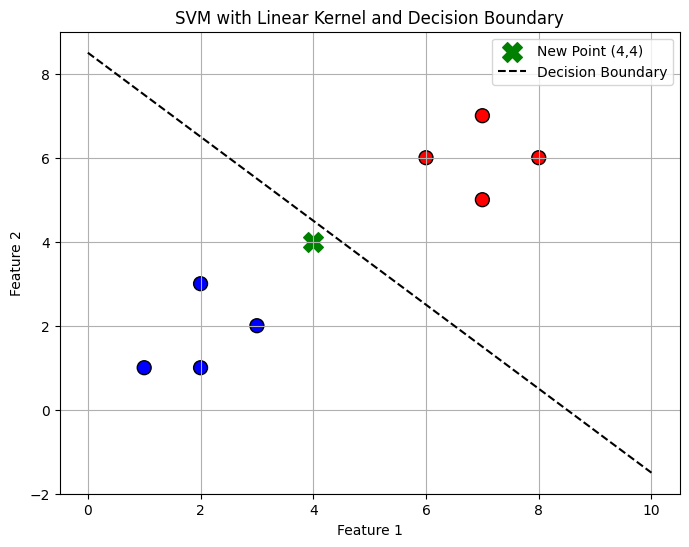

In [21]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Sample data
X = np.array([
    [2, 3],
    [1, 1],
    [2, 1],
    [3, 2],
    [6, 6],
    [7, 7],
    [8, 6],
    [7, 5]
])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

# Train the model
model = SVC(kernel='linear')
model.fit(X, y)

# Predict a new point
prediction = model.predict([[4, 4]])
print("Predicted class:", prediction[0])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=100, edgecolors='k')
plt.scatter(4, 4, c='green', s=200, marker='X', label='New Point (4,4)')

# Plot the decision boundary
# Step 1: Get the weights (w) and bias (b) from the model
w = model.coef_[0]
b = model.intercept_[0]

# Step 2: Create a range of x values and calculate corresponding y
x_vals = np.linspace(0, 10, 100)
y_vals = -(w[0] * x_vals + b) / w[1]

# Step 3: Plot the decision boundary
plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')

plt.title("SVM with Linear Kernel and Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.legend()
plt.show()


Predicted class: 0


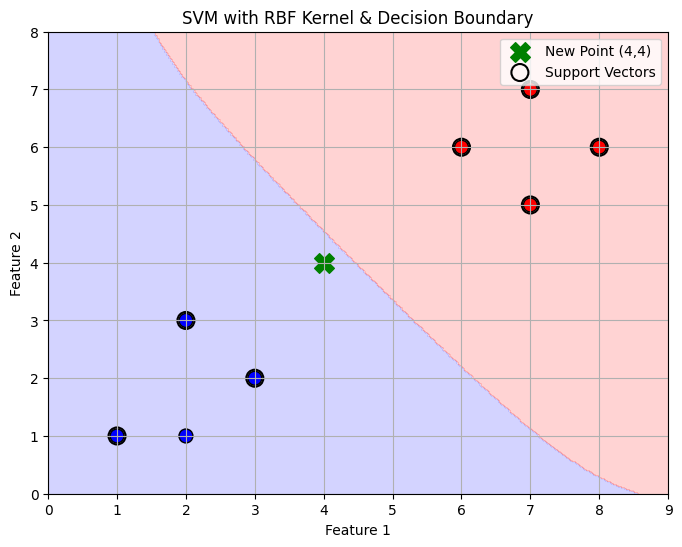

In [22]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Sample data
X = np.array([
    [2, 3],
    [1, 1],
    [2, 1],
    [3, 2],
    [6, 6],
    [7, 7],
    [8, 6],
    [7, 5]
])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

# Train the model with RBF kernel
model = SVC(kernel='rbf', probability=True)
model.fit(X, y)

# Predict a new point
prediction = model.predict([[4, 4]])
print("Predicted class:", prediction[0])

# Create mesh grid for decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict class probabilities on the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.2)  # Decision boundary region
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=100, edgecolors='k')  # Data points
plt.scatter(4, 4, c='green', s=200, marker='X', label='New Point (4,4)')  # New point

# Highlight support vectors
plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=150, facecolors='none', edgecolors='k', linewidths=1.5,
            label='Support Vectors')

plt.title("SVM with RBF Kernel & Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.legend()
plt.show()


In [23]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Data: [height in cm, weight in kg]
X = np.array([
    [160, 55],
    [165, 60],
    [170, 65],
    [180, 80],
    [175, 75]
])

# Labels: 0 = Slim, 1 = Heavy
y = np.array([0, 0, 0, 1, 1])

# Create and train the model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)

# Predict class for a new person [168 cm, 64 kg]
prediction = model.predict([[168, 64]])
print("Predicted Class:", "Heavy" if prediction[0] == 1 else "Slim")


Predicted Class: Slim


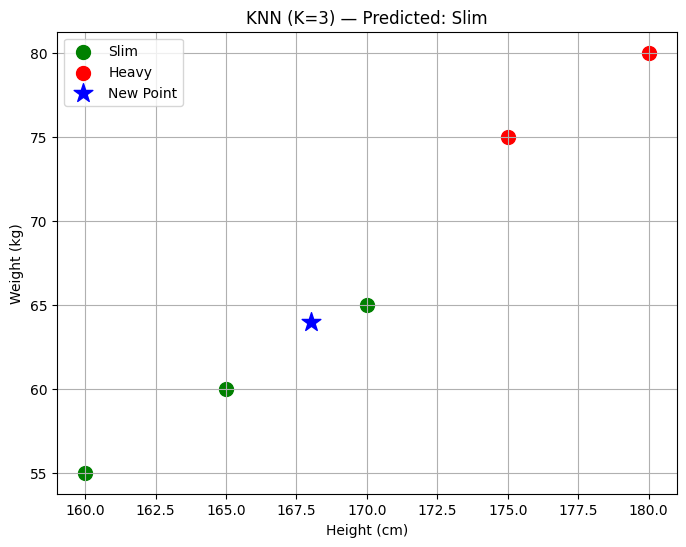

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Training data: [height, weight]
X = np.array([
    [160, 55],  # Slim
    [165, 60],  # Slim
    [170, 65],  # Slim
    [180, 80],  # Heavy
    [175, 75]   # Heavy
])
y = np.array([0, 0, 0, 1, 1])  # 0 = Slim, 1 = Heavy

# Create KNN model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)

# New data point to classify
new_point = np.array([[168, 64]])
prediction = model.predict(new_point)

# Plotting
plt.figure(figsize=(8, 6))
for i in range(len(X)):
    if y[i] == 0:
        plt.scatter(X[i, 0], X[i, 1], color='green', label='Slim' if i == 0 else "", s=100)
    else:
        plt.scatter(X[i, 0], X[i, 1], color='red', label='Heavy' if i == 3 else "", s=100)

# Plot the new point
plt.scatter(new_point[0, 0], new_point[0, 1], color='blue', label='New Point', s=200, marker='*')

plt.title(f'KNN (K=3) — Predicted: {"Heavy" if prediction[0]==1 else "Slim"}')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.grid(True)
plt.show()


Prediction: Spam


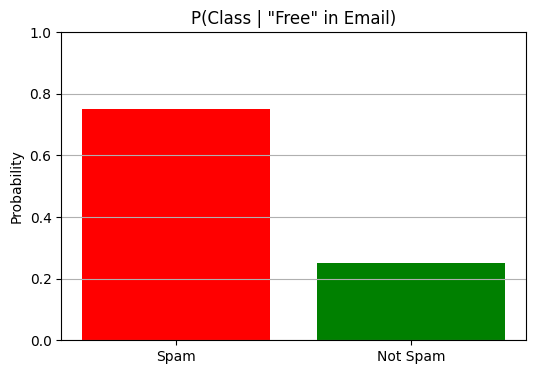

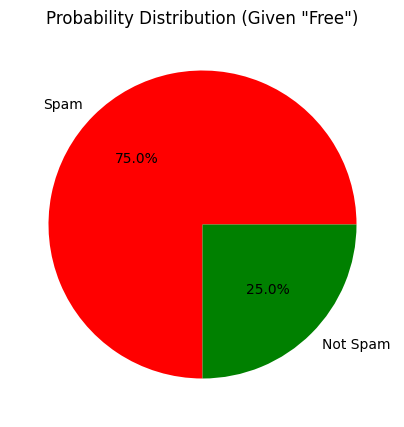

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Sample messages
texts = [
    "Win money now",         # spam
    "Free lottery tickets",  # spam
    "Meeting at 10am",       # not spam
    "Let’s catch up tomorrow",  # not spam
    "You won a free prize"   # spam
]

# Labels: 1 = spam, 0 = not spam
labels = [1, 1, 0, 0, 1]

# Convert text to feature vectors
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Train Naive Bayes model
model = MultinomialNB()
model.fit(X, labels)

# Predict a new message
new_message = ["free cash offer"]
new_vector = vectorizer.transform(new_message)
prediction = model.predict(new_vector)

print("Prediction:", "Spam" if prediction[0] == 1 else "Not Spam")

import matplotlib.pyplot as plt

# Probabilities given "free" is in the message
labels = ['Spam', 'Not Spam']
probs = [0.75, 0.25]

# Bar Plot
plt.figure(figsize=(6, 4))
plt.bar(labels, probs, color=['red', 'green'])
plt.ylim(0, 1)
plt.title('P(Class | "Free" in Email)')
plt.ylabel('Probability')
plt.grid(axis='y')
plt.show()

# Optional: Pie Chart
plt.figure(figsize=(5, 5))
plt.pie(probs, labels=labels, autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Probability Distribution (Given "Free")')
plt.show()

